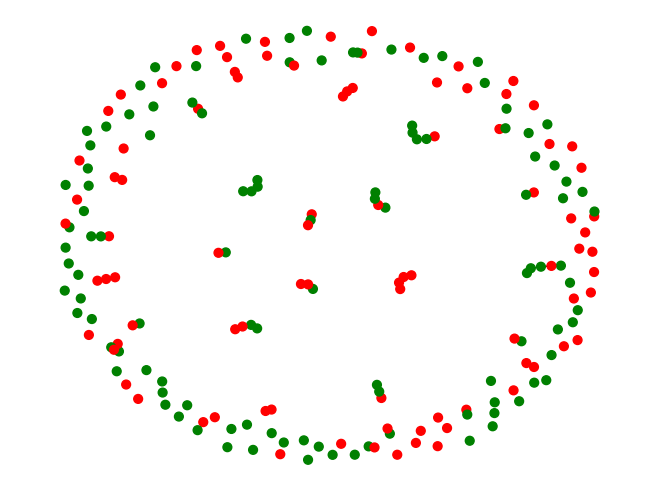

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5859 - loss: 0.6759 - val_accuracy: 0.6875 - val_loss: 0.5945
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8752 - loss: 0.5526 - val_accuracy: 1.0000 - val_loss: 0.3979
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.3236 - val_accuracy: 1.0000 - val_loss: 0.1813
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.1339 - val_accuracy: 1.0000 - val_loss: 0.0793
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0578 - val_accuracy: 1.0000 - val_loss: 0.0382
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0350  

Test Accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Text: "I love this!"
Predicted Sentiment: Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Text: "This is awful"
Predicted Sentiment: Negative

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Text: "you like it"
Predicted Sentiment: Positive



In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Load data
nodes = pd.read_csv('nodes.csv')
edges = pd.read_csv('edges.csv')
labels = pd.read_csv('labels.csv')

# Merge labels with node info
data = pd.merge(nodes, labels, on='user_id')

# Build graph
G = nx.Graph()
G.add_nodes_from(data['user_id'])
G.add_edges_from(edges[['user_id1', 'user_id2']].values)

# Draw colored subgraph
nodes = data['user_id'][:200]
colors = data[data['user_id'].isin(nodes)]['label'].map({0: 'red', 1: 'green'})

nx.draw(G.subgraph(nodes), node_color=colors, node_size=40, with_labels=False)

plt.show()


# Prepare text data
tokenizer = Tokenizer(num_words=2000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['text'])

X = pad_sequences(tokenizer.texts_to_sequences(data['text']), maxlen=15)
y = data['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# RNN model
model = Sequential([
    Embedding(2000, 32, input_length=15),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_split=0.2)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc*100:.2f}%")

# Prediction function
def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=15)
    pred = model.predict(padded)[0][0]
    return 'Positive' if pred > 0.5 else 'Negative'

def show_prediction(text):
    result = predict_sentiment(text)
    print(f"Text: \"{text}\"\nPredicted Sentiment: {result}\n")

show_prediction("I love this!")
show_prediction("This is awful")
show_prediction("you like it")



In [ ]:
import pandas as pd
import networkx as nx

edges = pd.read_csv('edges.csv')
nodes = pd.read_csv('nodes.csv')
labels = pd.read_csv('labels.csv')

edges.head(), nodes.head(), labels.head()

(   user_id1  user_id2
 0       903        36
 1       210       744
 2       475       741
 3       418       353
 4       347       676,
    user_id              text
 0        1    Superb quality
 1        2        Worst ever
 2        3  This is terrible
 3        4      I hate this!
 4        5          Loved it,
    user_id  label
 0        1      1
 1        2      0
 2        3      0
 3        4      0
 4        5      1)

In [ ]:
data = pd.merge(nodes, labels, on='user_id')

data.head()

,user_id,text,label
0,1,Superb quality,1
1,2,Worst ever,0
2,3,This is terrible,0
3,4,I hate this!,0
4,5,Loved it,1


In [ ]:
graph = nx.Graph()
graph.add_nodes_from(data['user_id'])
graph.add_edges_from(edges.values)


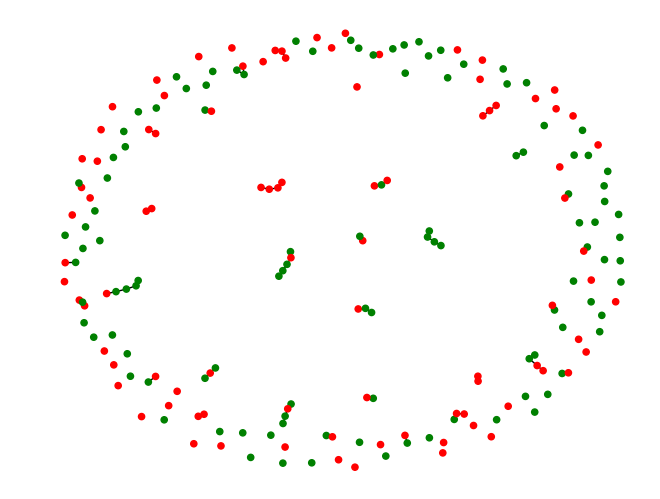

In [ ]:
import matplotlib.pyplot as plt

nx.draw(graph.subgraph(data['user_id'][:200]),
        node_color=data['label'][:200].map({1:'green', 0:'red'}),
        node_size=20)

In [ ]:
# sentence -> tokenize -> sequnece -> padding -> embedding -> training

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=2000, oov_token='<OOV>')

tokenizer.fit_on_texts(data['text']) # tokenize

tokenize_text = tokenizer.texts_to_sequences(data['text']) # sequencing

padded_text = pad_sequences(tokenize_text, maxlen=15) # padding

padded_text[:5]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 27,  9],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 23, 12],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  3,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6, 29,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  4]],
      dtype=int32)

In [ ]:
X = padded_text
y = data['label']


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X.shape, y.shape

((1000, 15), (1000,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding

model = Sequential(
    [
        Embedding(2000, output_dim = 32),
        SimpleRNN(32),
        Dense(1,activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])


model.fit(X_train,y_train,epochs=5)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5560 - loss: 0.6818
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9510 - loss: 0.5127
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.2452
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0786
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0311


In [ ]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0165 


[0.017611883580684662, 1.0]

In [ ]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


In [ ]:
y_pred[:5]

array([[0.00981676],
       [0.00924886],
       [0.03447335],
       [0.04272946],
       [0.01785721]], dtype=float32)